In [11]:
import pandas as pd
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

sns.set_theme(style="ticks")

pd.set_option("display.max_columns", None) 
#pd.set_option("display.max_rows", None) 

In [12]:
df = pd.read_csv("kmv_trace.csv")
df_base = pd.read_csv("kmv_baseline.csv")
df_base.drop(["id","epsilon","delta"], axis=1, inplace=True)

In [13]:
df.columns

Index(['id', 'target', 'epsilon', 'delta', 'tempo_inicio', 'tempo_fim',
       'prediction'],
      dtype='object')

In [14]:
TARGETS = df["target"].unique()
TARGETS.sort()
TARGETS

array([0, 1, 7, 8])

In [15]:
METRICAS = ["prediction", "tempo_exec", "k_times_N"]

In [16]:
df[["tempo_inicio", "tempo_fim"]].head()

,tempo_inicio,tempo_fim
0,Sun Jul 25 14:12:58 -03 2021,Sun Jul 25 14:13:00 -03 2021
1,Sun Jul 25 14:13:01 -03 2021,Sun Jul 25 14:13:08 -03 2021
2,Sun Jul 25 14:13:09 -03 2021,Sun Jul 25 14:13:15 -03 2021
3,Sun Jul 25 14:13:16 -03 2021,Sun Jul 25 14:13:22 -03 2021
4,Sun Jul 25 14:13:23 -03 2021,Sun Jul 25 14:13:30 -03 2021


In [17]:
## A posição referente a hora muda de acordo com a saída do comando `date`
df['tempo_inicio'] = df['tempo_inicio'].apply(lambda x: x.split(' ')[3])
df['tempo_fim'] = df['tempo_fim'].apply(lambda x: x.split(' ')[3])
#
df_base['tempo_inicio'] = df_base['tempo_inicio'].apply(lambda x: x.split(' ')[3])
df_base['tempo_fim'] = df_base['tempo_fim'].apply(lambda x: x.split(' ')[3])

In [18]:
df['tempo_inicio'] = pd.to_datetime(df['tempo_inicio'], format='%H:%M:%S')
df['tempo_fim'] = pd.to_datetime(df['tempo_fim'], format='%H:%M:%S')
df['tempo_exec'] = (df['tempo_fim'] - df['tempo_inicio']).dt.seconds
df.drop(['tempo_inicio', 'tempo_fim'], axis=1, inplace=True)
#
df_base['tempo_inicio'] = pd.to_datetime(df_base['tempo_inicio'], format='%H:%M:%S')
df_base['tempo_fim'] = pd.to_datetime(df_base['tempo_fim'], format='%H:%M:%S')
df_base['tempo_exec'] = (df_base['tempo_fim'] - df_base['tempo_inicio']).dt.seconds
df_base.drop(['tempo_inicio', 'tempo_fim'], axis=1, inplace=True)

In [19]:
df['k_posicoes'] = ((1.04/df['epsilon'])*(1.04/df['epsilon'])).apply(lambda x: int(math.log2(x+1)))
df["N_copias"] = df["delta"].apply(lambda x: int(math.log(1/x)+1))
df["k_times_N"] = df['k_posicoes'] * df["N_copias"]

In [20]:
df.sort_values(["target", "epsilon", "delta", "id"])["k_posicoes"].unique()

array([6, 4, 3, 2])

In [21]:
df_base = df_base[df_base["target"].isin(TARGETS)]
df_base

,target,prediction,tempo_exec
0,0,1522917,2
1,1,6566,1
7,7,223090,2
8,8,78,1


In [ ]:
df[METRICAS[3]]

0      40
1      65
2      40
3      65
4      18
       ..
715    24
716    18
717    30
718    39
719    65
Name: k_times_N, Length: 720, dtype: int64

In [ ]:
EPS = df["epsilon"].unique()
EPS.sort()
UNIQ_EPS = len(EPS)
EPS

array([0.01, 0.05, 0.1 ])

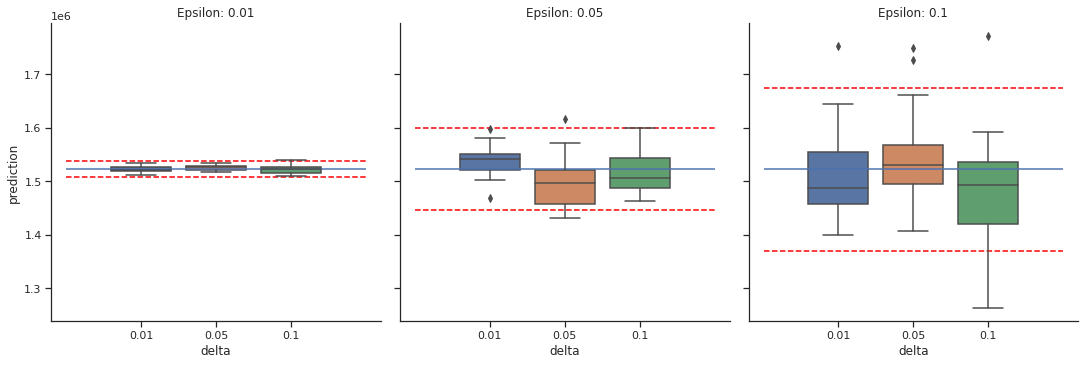

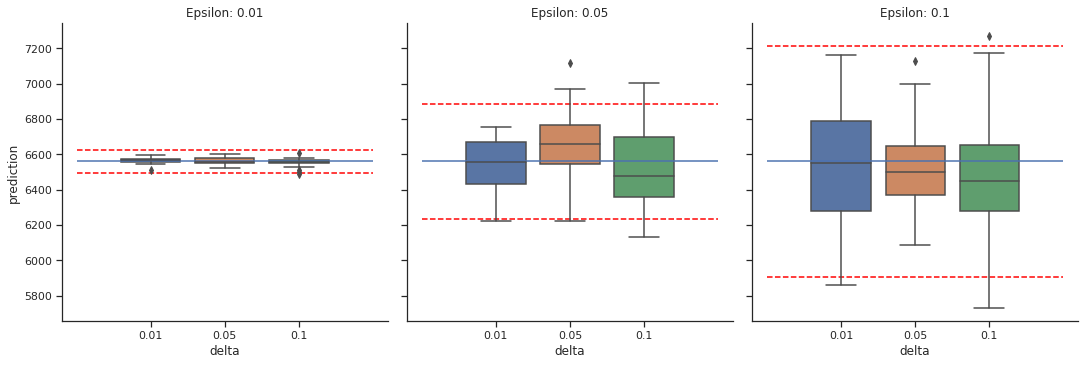

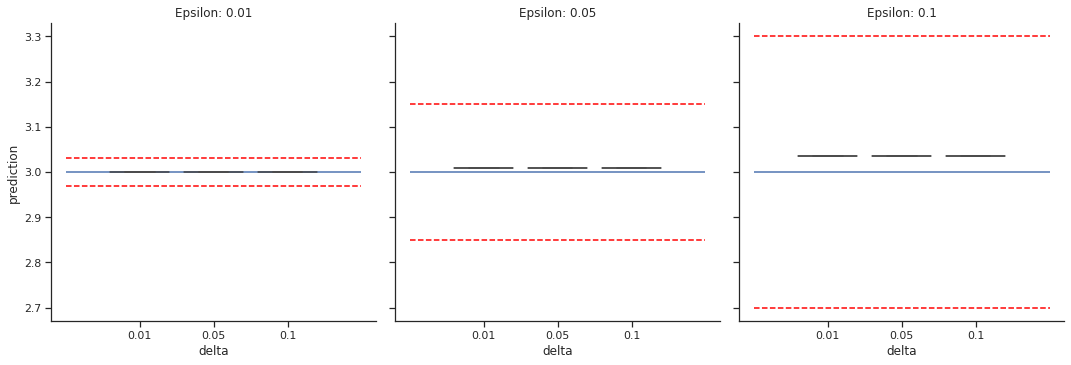

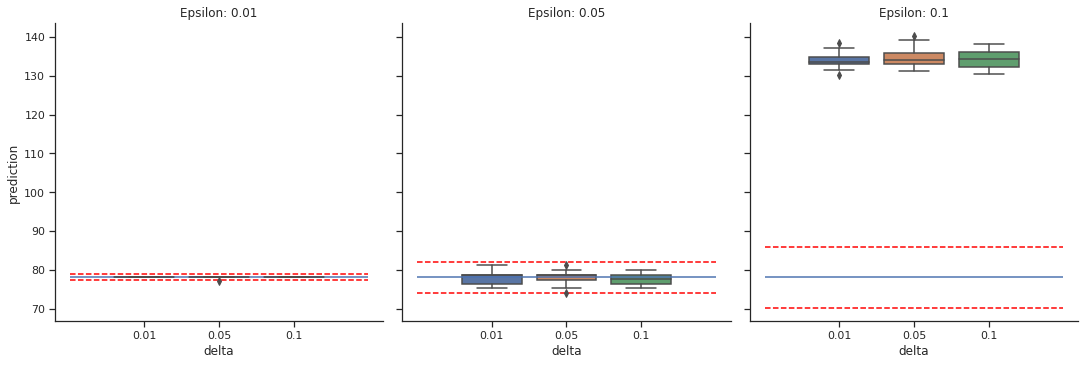

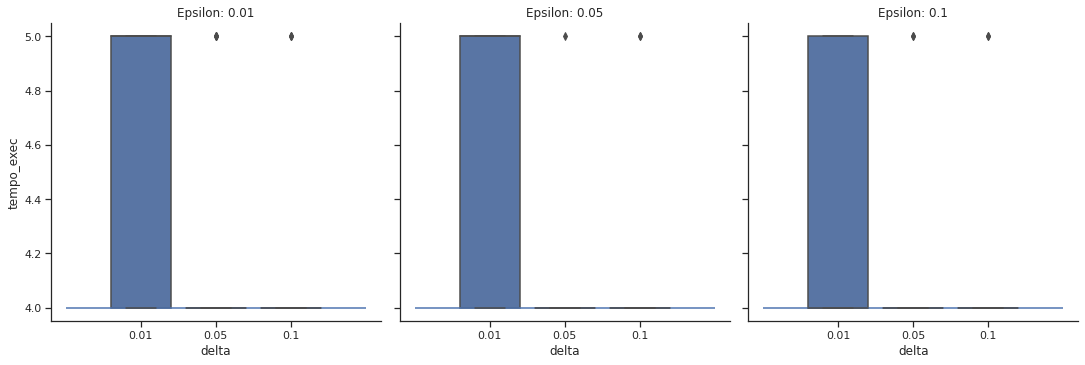

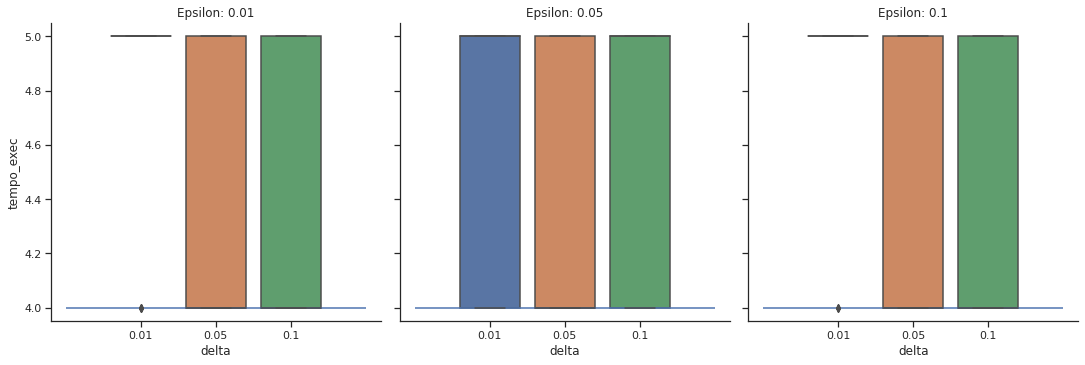

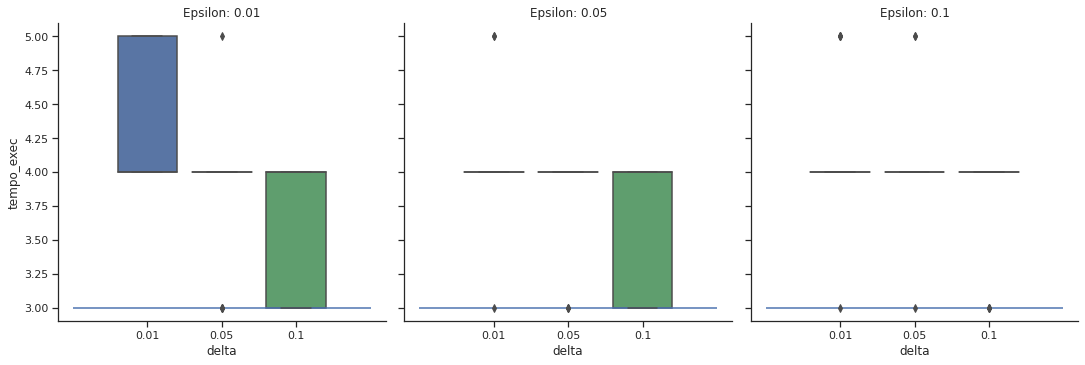

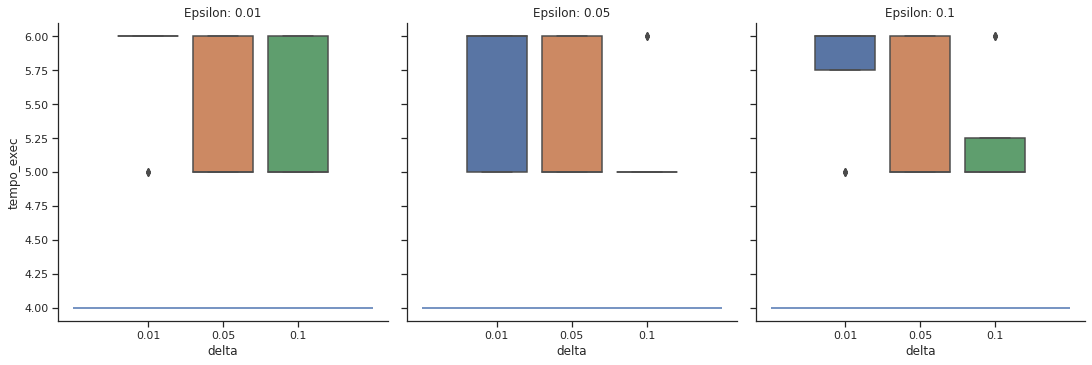

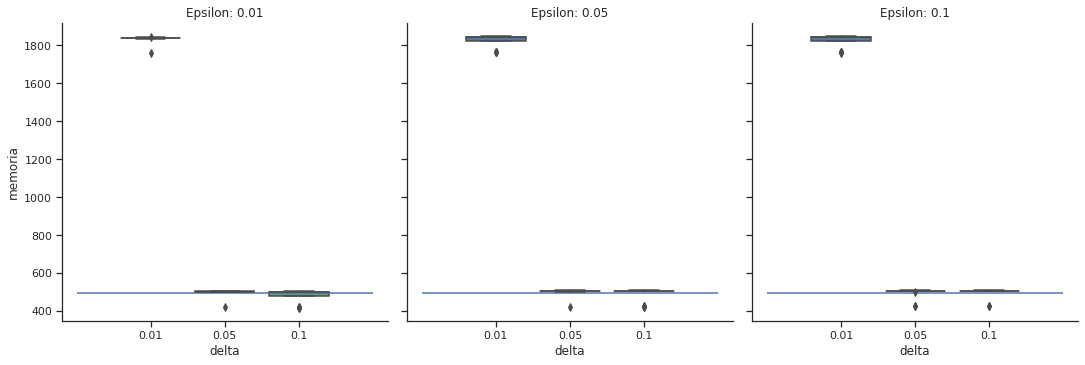

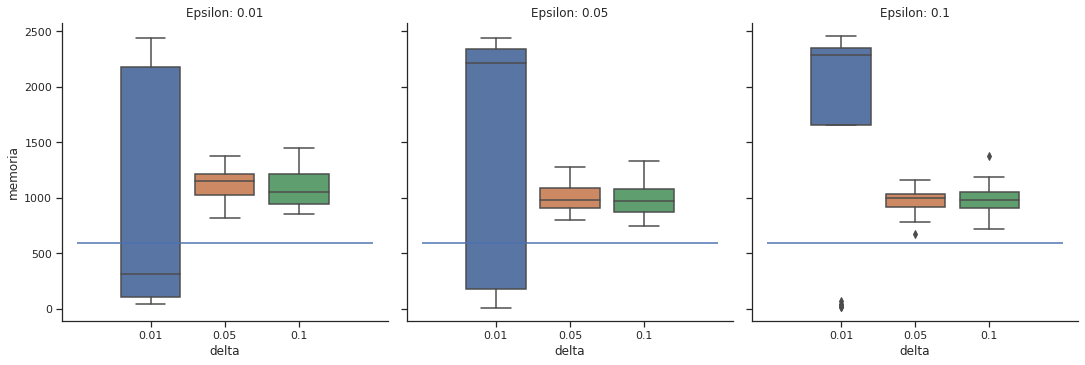

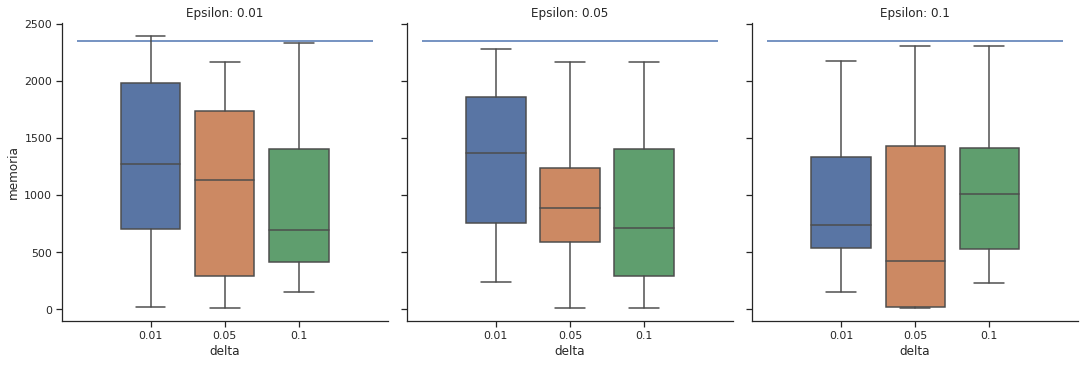

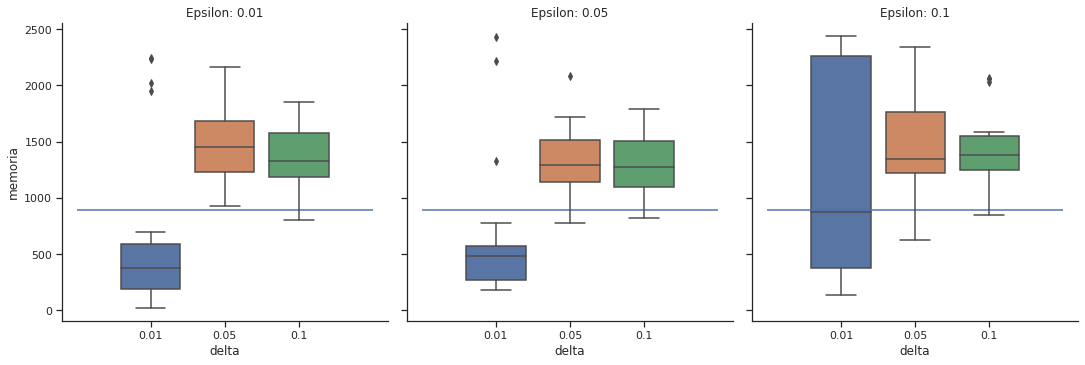

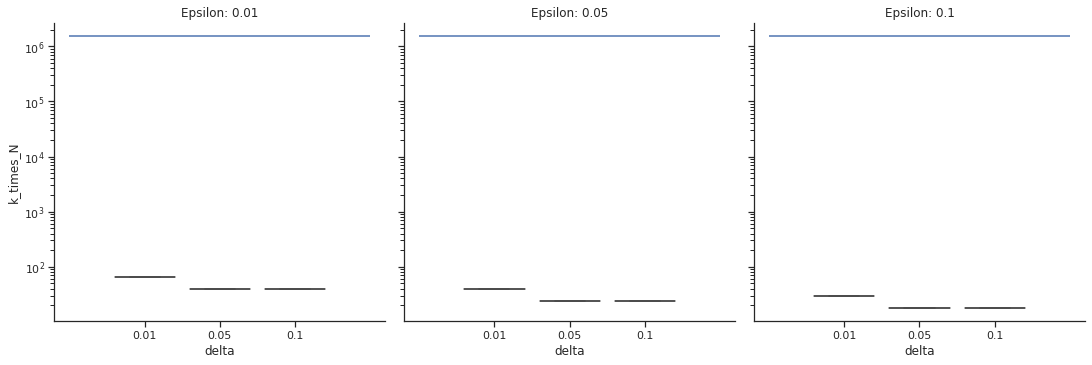

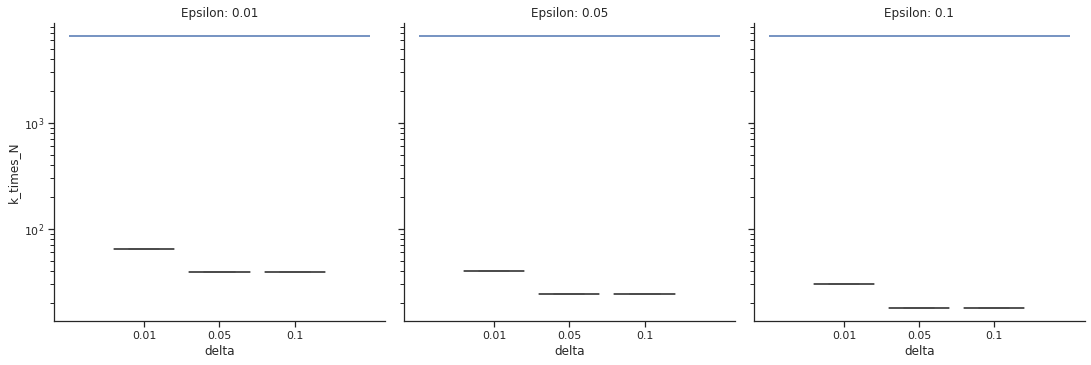

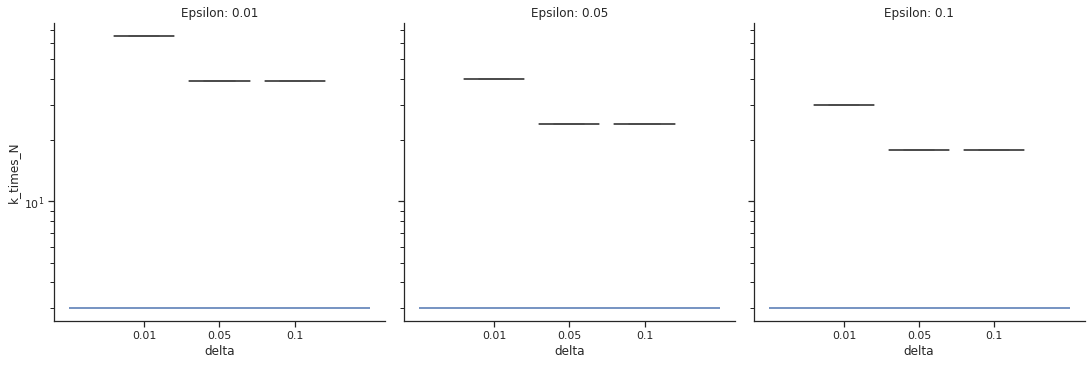

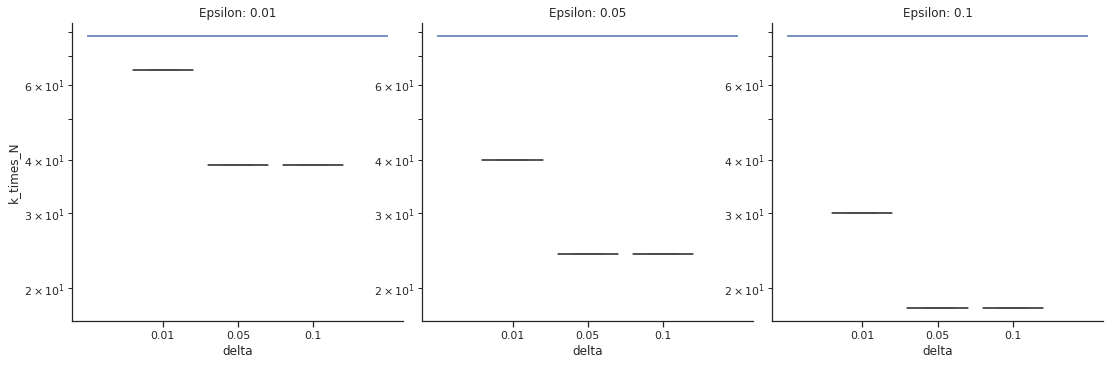

In [ ]:
for m in METRICAS:
    if (m == "k_times_N"):
        _m = "prediction"
    else:
        _m = m
    for n in TARGETS:
        
        g = sns.catplot(
                data=df[df['target']==n], x='delta', y=m,
                col='epsilon', kind='box', col_wrap=UNIQ_EPS
        )
        for i in range(0,UNIQ_EPS):
            t = df_base[df_base["target"]==n][_m].iloc[0]
            g.axes[i].hlines(y=t,xmin=-1, xmax=UNIQ_EPS)
            if (m == "prediction"):
                e = EPS[i]
                #(i+1)/10
                g.axes[i].hlines(y=t*(1+e),xmin=-1, xmax=UNIQ_EPS, colors = ["red"], linestyles="dashed")
                g.axes[i].hlines(y=t*(1-e),xmin=-1, xmax=UNIQ_EPS, colors = ["red"], linestyles="dashed")

        #g.set_axis_labels("Delta", "Predição")
        if (m == 'k_times_N'):
            g.set(yscale="log")
        g.set_titles(col_template="Epsilon: {col_name}")
        g.savefig(f"../img/target_{n}_{m}.png")

In [ ]:
t = df_base[df_base["target"]==0]["tempo_exec"].iloc[0]
df1 = df[df["target"]==0]
X = df1[["epsilon","delta"]].values
# y = 1 * x_0 + 2 * x_1 + 3
y = df1["prediction"].values
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
#reg.coef_
#reg.intercept_
reg.predict(np.array([[0.0001, 0.001]]))

0.018644427496742222


array([1534494.41745343])